# Data Cleaning \& Feature Engineering Notebook

In [51]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import size_review_functions as fxn
%matplotlib inline

In [2]:
modcloth_data = pd.read_json('modcloth_final_data.zip', lines=True)

In [3]:
modcloth_data.head()

,bra size,bust,category,cup size,fit,height,hips,item_id,length,quality,review_summary,review_text,shoe size,shoe width,size,user_id,user_name,waist
0,34.0,36,new,d,small,5ft 6in,38.0,123373,just right,5.0,NaN,NaN,NaN,NaN,7,991571,Emily,29.0
1,36.0,NaN,new,b,small,5ft 2in,30.0,123373,just right,3.0,NaN,NaN,NaN,NaN,13,587883,sydneybraden2001,31.0
2,32.0,NaN,new,b,small,5ft 7in,NaN,123373,slightly long,2.0,NaN,NaN,9.0,NaN,7,395665,Ugggh,30.0
3,NaN,NaN,new,dd/e,fit,NaN,NaN,123373,just right,5.0,NaN,NaN,NaN,NaN,21,875643,alexmeyer626,NaN
4,36.0,NaN,new,b,small,5ft 2in,NaN,123373,slightly long,5.0,NaN,NaN,NaN,NaN,18,944840,dberrones1,NaN


### Next Steps for Rent The Runway:
1. change column name spaces to underscores
2. convert ```review_date``` to datetime
3. determine if ```rented_for``` is a categorical
4. determine if ```body_type``` is categorical
5. determine if ```fit``` is categorical
6. convert ```weight``` to pounds as an int64
7. find size chart data on RTR and add that to each user
8. Change ```bust_size``` to ```band_size``` and ```cup_size``` and make ```band_size``` an int
9. look for ```item_id``` on RTR site _is not on site_
10. convert ```height``` to inches as an int

### Questions:
1. Given a height range, did users with higher weight have different ratings than users with lower weight?

2. 

In [4]:
modcloth_data.height = modcloth_data.height.apply(fxn.convert_feetinches_to_inches)
modcloth_data.head()

,bra size,bust,category,cup size,fit,height,hips,item_id,length,quality,review_summary,review_text,shoe size,shoe width,size,user_id,user_name,waist
0,34.0,36,new,d,small,66.0,38.0,123373,just right,5.0,NaN,NaN,NaN,NaN,7,991571,Emily,29.0
1,36.0,NaN,new,b,small,62.0,30.0,123373,just right,3.0,NaN,NaN,NaN,NaN,13,587883,sydneybraden2001,31.0
2,32.0,NaN,new,b,small,67.0,NaN,123373,slightly long,2.0,NaN,NaN,9.0,NaN,7,395665,Ugggh,30.0
3,NaN,NaN,new,dd/e,fit,NaN,NaN,123373,just right,5.0,NaN,NaN,NaN,NaN,21,875643,alexmeyer626,NaN
4,36.0,NaN,new,b,small,62.0,NaN,123373,slightly long,5.0,NaN,NaN,NaN,NaN,18,944840,dberrones1,NaN


In [5]:
modcloth_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82790 entries, 0 to 82789
Data columns (total 18 columns):
bra size          76772 non-null float64
bust              11854 non-null object
category          82790 non-null object
cup size          76535 non-null object
fit               82790 non-null object
height            81683 non-null float64
hips              56064 non-null float64
item_id           82790 non-null int64
length            82755 non-null object
quality           82722 non-null float64
review_summary    76065 non-null object
review_text       76065 non-null object
shoe size         27915 non-null float64
shoe width        18607 non-null object
size              82790 non-null int64
user_id           82790 non-null int64
user_name         82790 non-null object
waist             2882 non-null float64
dtypes: float64(6), int64(3), object(9)
memory usage: 11.4+ MB


In [6]:
modcloth_data.duplicated().value_counts()

False    82413
True       377
dtype: int64

In [7]:
modcloth_data.drop_duplicates(keep = False, inplace= True)

In [8]:
modcloth_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82036 entries, 0 to 82789
Data columns (total 18 columns):
bra size          76070 non-null float64
bust              11738 non-null object
category          82036 non-null object
cup size          75835 non-null object
fit               82036 non-null object
height            80933 non-null float64
hips              55544 non-null float64
item_id           82036 non-null int64
length            82001 non-null object
quality           81968 non-null float64
review_summary    75343 non-null object
review_text       75343 non-null object
shoe size         27665 non-null float64
shoe width        18435 non-null object
size              82036 non-null int64
user_id           82036 non-null int64
user_name         82036 non-null object
waist             2880 non-null float64
dtypes: float64(6), int64(3), object(9)
memory usage: 11.9+ MB


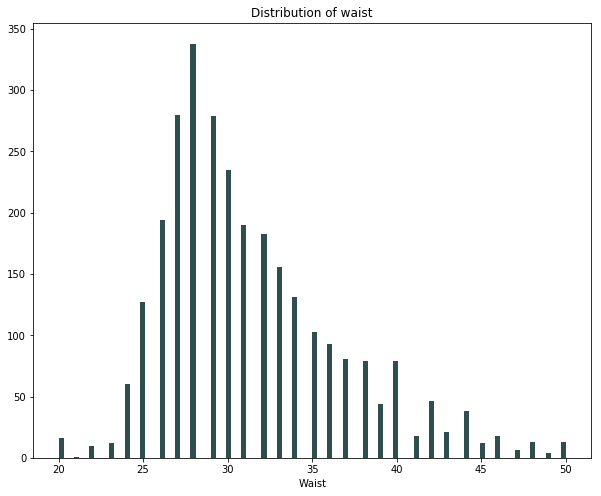

In [28]:
figure = plt.figure(figsize=(10, 8))

axes = figure.add_subplot(1, 1, 1)
axes.hist(modcloth_data['waist'], color="darkslategray",bins=100)
axes.set_title("Distribution of waist")
axes.set_xlabel("Waist")

plt.show()
plt.close()



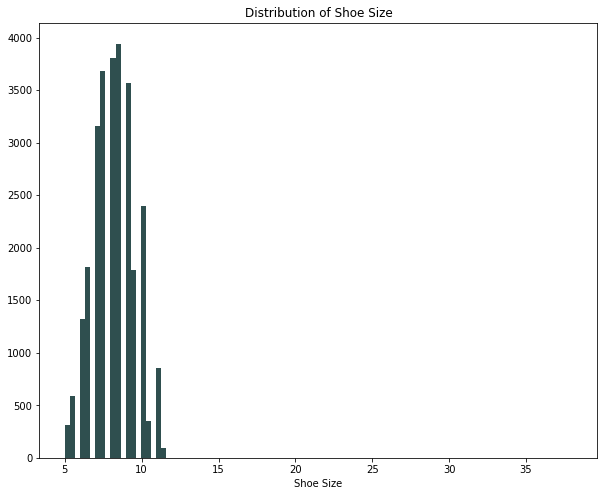

In [27]:
figure = plt.figure(figsize=(10, 8))

axes = figure.add_subplot(1, 1, 1)
axes.hist(modcloth_data['shoe size'], color="darkslategray",bins=100)
axes.set_title("Distribution of Shoe Size")
axes.set_xlabel("Shoe Size")

plt.show()
plt.close()



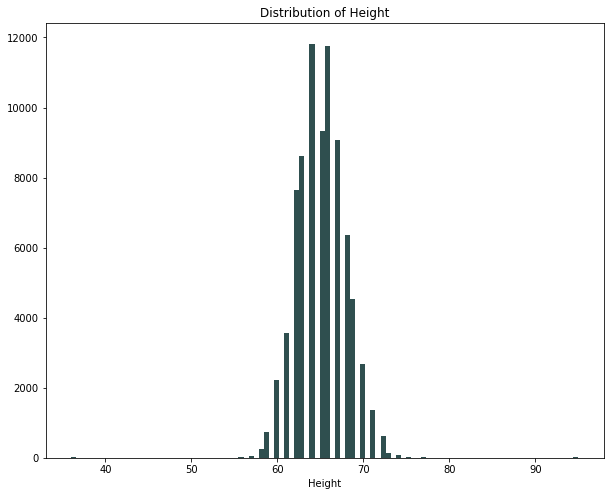

In [35]:
figure = plt.figure(figsize=(10, 8))

axes = figure.add_subplot(1, 1, 1)
axes.hist(modcloth_data['height'], color="darkslategray",bins=100)
axes.set_title("Distribution of Height")
axes.set_xlabel("Height")

plt.show()
plt.close()



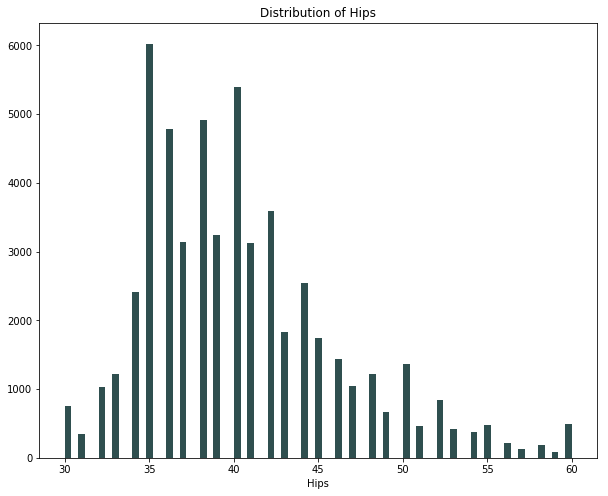

In [37]:
figure = plt.figure(figsize=(10, 8))

axes = figure.add_subplot(1, 1, 1)
axes.hist(modcloth_data['hips'], color="darkslategray",bins=75)
axes.set_title("Distribution of Hips")
axes.set_xlabel("Hips")

plt.show()
plt.close()



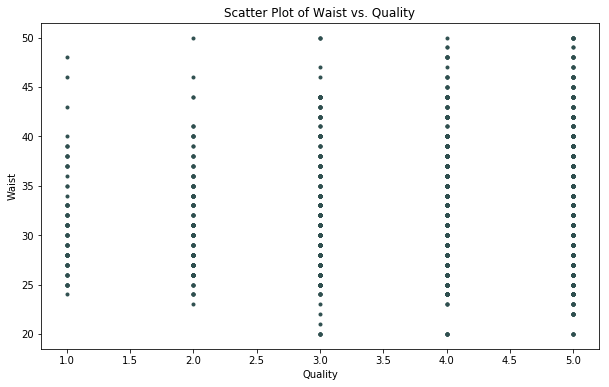

In [65]:
figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 1, 1)
axes.scatter(  modcloth_data['quality'], modcloth_data['waist'],marker=".", color="darkslategray")

axes.set_ylabel("Waist")
axes.set_xlabel("Quality")
axes.set_title("Scatter Plot of Waist vs. Quality")

plt.show()
plt.close()

In [9]:
columns_to_drop_modcloth = [
    'bust','shoe size','shoe width','waist'
]
modcloth_sub = modcloth_data.drop(columns_to_drop_modcloth, axis = 1)
modcloth_sub.head()

,bra size,category,cup size,fit,height,hips,item_id,length,quality,review_summary,review_text,size,user_id,user_name
0,34.0,new,d,small,66.0,38.0,123373,just right,5.0,NaN,NaN,7,991571,Emily
1,36.0,new,b,small,62.0,30.0,123373,just right,3.0,NaN,NaN,13,587883,sydneybraden2001
2,32.0,new,b,small,67.0,NaN,123373,slightly long,2.0,NaN,NaN,7,395665,Ugggh
3,NaN,new,dd/e,fit,NaN,NaN,123373,just right,5.0,NaN,NaN,21,875643,alexmeyer626
4,36.0,new,b,small,62.0,NaN,123373,slightly long,5.0,NaN,NaN,18,944840,dberrones1


In [69]:
modcloth_sub['waist_rank'] = modcloth_data.waist.rank(pct=True)

In [71]:
modcloth_sub['hip_rank'] = modcloth_sub.hips.rank(pct=True)

In [72]:
modcloth_sub.head()

,bra size,category,cup size,fit,height,hips,item_id,length,quality,review_summary,review_text,size,user_id,user_name,waist_rank,hip_rank
0,34.0,new,d,small,66.0,38.0,123373,just right,5.0,NaN,NaN,7,991571,Emily,0.409028,0.399413
1,36.0,new,b,small,62.0,30.0,123373,just right,3.0,NaN,NaN,13,587883,sydneybraden2001,0.572049,0.006769
2,32.0,new,b,small,67.0,NaN,123373,slightly long,2.0,NaN,NaN,7,395665,Ugggh,0.498264,NaN
3,NaN,new,dd/e,fit,NaN,NaN,123373,just right,5.0,NaN,NaN,21,875643,alexmeyer626,NaN,NaN
4,36.0,new,b,small,62.0,NaN,123373,slightly long,5.0,NaN,NaN,18,944840,dberrones1,NaN,NaN


In [76]:
modcloth_sub.drop(['category','review_summary','review_text','user_name'], axis = 1, inplace = True)
modcloth_sub.head()

,bra size,cup size,fit,height,hips,item_id,length,quality,size,user_id,waist_rank,hip_rank
0,34.0,d,small,66.0,38.0,123373,just right,5.0,7,991571,0.409028,0.399413
1,36.0,b,small,62.0,30.0,123373,just right,3.0,13,587883,0.572049,0.006769
2,32.0,b,small,67.0,NaN,123373,slightly long,2.0,7,395665,0.498264,NaN
3,NaN,dd/e,fit,NaN,NaN,123373,just right,5.0,21,875643,NaN,NaN
4,36.0,b,small,62.0,NaN,123373,slightly long,5.0,18,944840,NaN,NaN


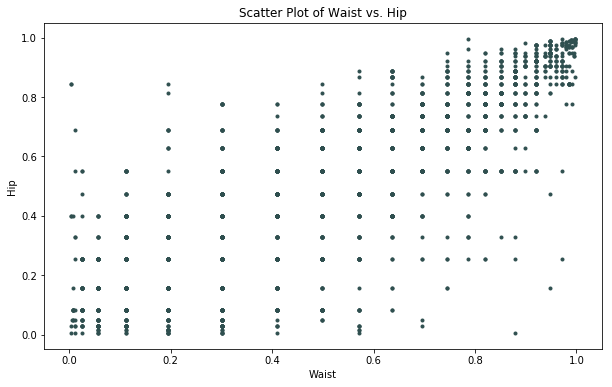

In [78]:
figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 1, 1)
axes.scatter(  modcloth_sub['waist_rank'], modcloth_sub['hip_rank'],marker=".", color="darkslategray")

axes.set_ylabel("Hip")
axes.set_xlabel("Waist")
axes.set_title("Scatter Plot of Waist vs. Hip")

plt.show()
plt.close()

In [ ]:
np.where(modcloth_sub.hips = NaN,  )

In [75]:
modcloth_sub.hips.describe()

count    55544.000000
mean        40.358617
std          5.828654
min         30.000000
25%         36.000000
50%         39.000000
75%         43.000000
max         60.000000
Name: hips, dtype: float64

In [10]:
modcloth_sub.quality.describe()

count    81968.000000
mean         3.949126
std          0.992892
min          1.000000
25%          3.000000
50%          4.000000
75%          5.000000
max          5.000000
Name: quality, dtype: float64

In [11]:
modcloth_sub.length.value_counts()

just right        61376
slightly long     11179
slightly short     6241
very long          2406
very short          799
Name: length, dtype: int64

In [12]:
top_ratings = modcloth_sub[(modcloth_data.length == 'just right')&(modcloth_data.quality >=4.0)]
top_ratings.describe()

,bra size,height,hips,item_id,quality,size,user_id
count,40456.000000,42908.000000,29440.000000,43493.000000,43493.000000,43493.000000,43493.000000
mean,35.904637,65.132493,40.258865,463212.177086,4.541811,12.459844,498841.039777
std,3.237236,2.837985,5.825830,215498.476042,0.498254,8.269546,286728.919053
min,28.000000,36.000000,30.000000,123373.000000,4.000000,0.000000,6.000000
25%,34.000000,63.000000,36.000000,298256.000000,4.000000,8.000000,252364.000000
50%,36.000000,65.000000,39.000000,427567.000000,5.000000,12.000000,498938.000000
75%,38.000000,67.000000,43.000000,657081.000000,5.000000,15.000000,745374.000000
max,48.000000,95.000000,60.000000,807722.000000,5.000000,38.000000,999923.000000


In [13]:
modcloth_sub.describe()

,bra size,height,hips,item_id,quality,size,user_id
count,76070.000000,80933.000000,55544.000000,82036.000000,81968.000000,82036.000000,82036.000000
mean,35.971079,65.142562,40.358617,469510.119204,3.949126,12.657809,498788.808755
std,3.223979,2.849230,5.828654,214136.368217,0.992892,8.269573,286293.903277
min,28.000000,36.000000,30.000000,123373.000000,1.000000,0.000000,6.000000
25%,34.000000,63.000000,36.000000,314980.000000,3.000000,8.000000,252931.750000
50%,36.000000,65.000000,39.000000,454030.000000,4.000000,12.000000,497571.000000
75%,38.000000,67.000000,43.000000,658440.000000,5.000000,15.000000,744574.000000
max,48.000000,95.000000,60.000000,807722.000000,5.000000,38.000000,999972.000000


In [14]:
#T-test that height affects high rating
stats.ttest_ind(modcloth_sub.height,top_ratings.height, axis = 0, equal_var = False, nan_policy = 'omit')

Ttest_indResult(statistic=0.5933417174906913, pvalue=0.5529540147147909)